In [1]:
import sympy as sym

In [16]:
theta, phi = sym.symbols("theta phi")
theta

theta

In [4]:
X = sym.Matrix([[0, 1],
                [1, 0]])
X

Matrix([
[0, 1],
[1, 0]])

In [5]:
Y = sym.Matrix([[0, -1j],
                [1j, 0]])
Y

Matrix([
[    0, -1.0*I],
[1.0*I,      0]])

In [6]:
Z = sym.Matrix([[1, 0],
                [0, -1]])
Z

Matrix([
[1,  0],
[0, -1]])

In [17]:
r = (sym.sin(phi / 2) * sym.cos(theta), sym.sin(phi / 2) * sym.sin(theta), sym.cos(phi / 2))
r

(sin(phi/2)*cos(theta), sin(phi/2)*sin(theta), cos(phi/2))

In [18]:
observable = r[0] * X + r[1] * Y + r[2] * Z
observable = sym.simplify(observable)
observable

Matrix([
[                 cos(phi/2), 1.0*exp(-I*theta)*sin(phi/2)],
[1.0*exp(I*theta)*sin(phi/2),                  -cos(phi/2)]])

In [14]:
def Rz(theta: sym.Symbol):
    return sym.Matrix([[sym.exp(-1j * theta / 2), 0],
                       [0, sym.exp(1j * theta / 2)]])

def Ry(theta: sym.Symbol):
    return sym.Matrix([[sym.cos(theta / 2), -sym.sin(theta / 2)],
                       [sym.sin(theta / 2), sym.cos(theta / 2)]])

In [21]:
def decomposition_ZY(alpha, beta, gamma, delta):
    return sym.exp(1j * alpha) * Rz(beta) * Ry(gamma) * Rz(delta)

In [23]:
u = decomposition_ZY(sym.pi / 2, theta, phi, sym.pi - theta)
u = sym.simplify(u)
u

Matrix([
[             cos(phi/2), -exp(-1.0*I*(theta - pi))*sin(phi/2)],
[exp(I*theta)*sin(phi/2),                          -cos(phi/2)]])

In [24]:
observable

Matrix([
[                 cos(phi/2), 1.0*exp(-I*theta)*sin(phi/2)],
[1.0*exp(I*theta)*sin(phi/2),                  -cos(phi/2)]])


# Find $U$

$$
\rho \xrightarrow[]{U} U \rho U^\dagger \xrightarrow[]{M} tr \left( M U \rho U^\dagger \right)
$$

First consider $A\otimes B$ 

$$
\begin{align}
tr \left( A \otimes B  \rho \right) & = \sum_{ j,k  }^{  } p \left( j,k  \right) a_{j} b_{k }  \\
& = \sum_{ j,k  }^{  } a_j b_k tr \left( \left| a_j  \right\rangle \left\langle a_j  \right| \otimes \left| a_k  \right\rangle \left\langle b_k  \right| \rho \right) \\
\end{align}
$$

Let $U_A \left| a_j  \right\rangle = \left| j  \right\rangle$ and $U_B \left| b_k  \right\rangle = \left| k \right\rangle$, then 

$$
\begin{align}
    tr \left( A \otimes B \rho  \right)
    & = \sum_{j, k   }^{  } a_j b_k tr \left( \left( U_A^\dagger \left| j \right\rangle \left\langle j \right| U_{A } \right) \otimes \left( U_{B }^{\dagger} \left| k \right\rangle \left\langle k \right| U_{B }  \right) \rho  \right) \\
    & = \sum_{ j, k  }^{  } a_j b_k tr \left( \left( U_A^{\dagger} \otimes U_{B }^{\dagger} \right) \left( \left| j \right\rangle \left\langle j \right| \otimes \left| k \right\rangle \left\langle k \right|  \right) \left( U_A \otimes U_B \right) \right) 
\end{align}
$$

Let $U = U_{A } \otimes U_{B }$ , $M = Z \otimes Z$, then 

$$
tr \left( A \otimes B \rho  \right) = tr \left( U^{\dagger} M U \rho  \right) = tr \left( M U \rho U^{\dagger} \right)
$$


Consider $A = \vec{a} \cdot \vec{\sigma} = \left| + \right\rangle \left\langle + \right| - \left| - \right\rangle \left\langle - \right|$, then $U = \left| 0 \right\rangle \left\langle + \right| + \left| 1 \right\rangle \left\langle - \right|$ . 

In $\Re^3$, $\vec{a} = \vec{r}(\theta, \phi)$, then 

$$
\begin{align}
    \left| + \right\rangle & = \vec{r}(\theta, \phi) = \cos{\frac{ \theta }{ 2  }} \left| 0 \right\rangle + e^{i \phi } \sin{ \frac{ \theta  }{ 2  }} \left| 1 \right\rangle \\
    \left| - \right\rangle & = \vec{r}(\pi - \theta, \pi + \phi) = \sin{\frac{ \theta  }{ 2  }} \left| 0 \right\rangle - e^{i \phi } \cos{ \frac{ \theta  }{ 2  }} \left| 1 \right\rangle
\end{align}
$$

We can calculate 

$$
\begin{align}
    U & = \left| 0 \right\rangle \left\langle + \right| + \left| 1 \right\rangle \left\langle - \right| \\
    & = \begin{bmatrix}
        \cos{ \frac{ \theta  }{ 2  }} & e^{-i\phi } \sin{ \frac{ \theta  }{ 2  }} \\
        \sin{\frac{ \theta  }{ 2 }} & -e^{-i\phi} \cos{\frac{ \theta  }{ 2 }}
    \end{bmatrix}
\end{align}
$$

For any $U$, using Z-Y decomposition 

$$
\begin{align}
    U & = e^{i \alpha} R_z(\beta) R_y(\gamma) R_z(\delta) \\ 
    & = e^{i \left( \alpha + \frac{ -\beta - \delta  }{ 2  } \right)}\begin{bmatrix}
        \cos{\frac{ \gamma  }{ 2  }} & -e^{i \delta } \sin{\frac{ \gamma  }{ 2  }} \\
        e^{i \beta}\sin{\frac{ \gamma  }{ 2 }} & e^{i (\beta + \delta)} \cos{\frac{ \gamma  }{ 2 }}
    \end{bmatrix}
\end{align}
$$

Let 
$$
\begin{cases}
    \gamma = \theta\\
    \beta = 0 \\
    \alpha = \frac{\delta  }{ 2  } = \frac{ \pi - \phi  }{ 2 } \\
    \delta = -\pi - \phi  = \pi - \phi
\end{cases}
$$

then 

$$
U_A = e^{i \left( \frac{ \pi  }{ 2  } - \frac{ \phi  }{ 2  } \right)} R_z(0) R_y(\theta ) R_z(\pi - \phi)
$$


In [2]:
import sympy as sym
import numpy as np

In [8]:
theta, phi = sym.symbols("theta phi", real=True)
theta

theta

In [3]:
zero = sym.Matrix([[1], [0]])
zero

Matrix([
[1],
[0]])

In [4]:
one = sym.Matrix([[0], [1]])
one

Matrix([
[0],
[1]])

In [9]:
plus = sym.Matrix([[sym.cos(theta / 2)], [sym.exp(1j * phi) * sym.sin(theta / 2)]])
plus

Matrix([
[               cos(theta/2)],
[exp(1.0*I*phi)*sin(theta/2)]])

In [10]:
minus = sym.Matrix([[sym.sin(theta / 2)], [-sym.exp(1j * phi) * sym.cos(theta / 2)]])
minus

Matrix([
[                sin(theta/2)],
[-exp(1.0*I*phi)*cos(theta/2)]])

In [11]:
plus.adjoint()

Matrix([[cos(theta/2), exp(-1.0*I*phi)*sin(theta/2)]])

In [12]:
U_A = zero * plus.adjoint() + one * minus.adjoint()
U_A 

Matrix([
[cos(theta/2),  exp(-1.0*I*phi)*sin(theta/2)],
[sin(theta/2), -exp(-1.0*I*phi)*cos(theta/2)]])

In [13]:
def Rz(theta: sym.Symbol):
    return sym.Matrix([[sym.exp(-1j * theta / 2), 0],
                       [0, sym.exp(1j * theta / 2)]])

def Ry(theta: sym.Symbol):
    return sym.Matrix([[sym.cos(theta / 2), -sym.sin(theta / 2)],
                       [sym.sin(theta / 2), sym.cos(theta / 2)]])

In [15]:
decomp = sym.exp(1j * (sym.pi / 2 - phi / 2)) * Rz(0) * Ry(theta) * Rz(sym.pi - phi)
decomp = sym.simplify(decomp)
decomp

Matrix([
[cos(theta/2), -exp(-1.0*I*(phi - pi))*sin(theta/2)],
[sin(theta/2),  exp(-1.0*I*(phi - pi))*cos(theta/2)]])

In [16]:
U_A.equals(decomp)

True

# CHSH

In [1]:
import numpy as np
from mindquantum.simulator import Simulator
from mindquantum.core.circuit import Circuit
from mindquantum.core.parameterresolver import ParameterResolver
from mindquantum.core.operators import Hamiltonian, QubitOperator
from mindquantum.core.gates import RZ, RY
import mindspore as ms

ms.context.set_context(mode=ms.context.PYNATIVE_MODE, device_target="CPU")

In [4]:
def generate_circuit2(p1: int, p2: int) -> Circuit:
    circ = Circuit()

    circ += RZ(pr=ParameterResolver(
        data={f"phi{p1}": -1},
        const=np.pi,
    )).on(0)
    circ += RY(f"theta{p1}").on(0)

    circ += RZ(pr=ParameterResolver(
        data={f"phi{p2}": -1},
        const=np.pi,
    )).on(1)
    circ += RY(f"theta{p2}").on(1)

    return circ

def generate_circuit3(p1: int, p2: int, p3: int) -> Circuit:
    circ = Circuit()

    circ += RZ(pr=ParameterResolver(
        data={f"phi{p1}": -1},
        const=np.pi,
    )).on(0)
    circ += RY(f"theta{p1}").on(0)

    circ += RZ(pr=ParameterResolver(
        data={f"phi{p2}": -1},
        const=np.pi,
    )).on(1)
    circ += RY(f"theta{p2}").on(1)

    circ += RZ(pr=ParameterResolver(
        data={f"phi{p3}": -1},
        const=np.pi,
    )).on(2)
    circ += RY(f"theta{p3}").on(2)

    return circ



| $A$ | $A'$ | $B$ | $B'$ |
| --- | -----| --- | --- |
| $\theta_1, \phi_1$ | $\theta_2, \phi_2$ | $\theta_3, \phi_3$ | $\theta_4, \phi_4$ |

In [3]:
# A x B
generate_circuit2(1, 3)

q0: ──RZ(-phi1 + π)────RY(theta1)──

q1: ──RZ(-phi3 + π)────RY(theta3)──

Consider binary representation. $X \otimes Y \otimes Z = 000$ and $X' \otimes Y' \otimes Z' = 111$ .

The parameters of $X, X', Y, Y', Z, Z'$ are $p_0, p_1, p_2, p_4, p_5, p_6$.

In [5]:
generate_circuit3(0, 2, 4)

q0: ──RZ(-phi0 + π)────RY(theta0)──

q1: ──RZ(-phi2 + π)────RY(theta2)──

q2: ──RZ(-phi4 + π)────RY(theta4)──

In [26]:
from mindquantum.framework import MQAnsatzOnlyOps

class QNet2(ms.nn.Cell):
    def __init__(self, grad_ops1, grad_ops2, grad_ops3, grad_ops4) -> None:
        super().__init__()
        self.w = ms.Parameter(ms.Tensor(np.random.uniform(-np.pi, np.pi, 8).astype(np.float32)), name="weight")
        self.q_ops1 = MQAnsatzOnlyOps(grad_ops1)
        self.q_ops2 = MQAnsatzOnlyOps(grad_ops2)
        self.q_ops3 = MQAnsatzOnlyOps(grad_ops3)
        self.q_ops4 = MQAnsatzOnlyOps(grad_ops4)
    
    def construct(self):
        # w[[0, 1]] -- theta1, phi1
        # w[[2, 3]] -- theta2, phi2
        # w[[4, 5]] -- theta3, phi3
        # w[[6, 7]] -- theta4, phi4
        e1 = self.q_ops1(self.w[[0, 1, 4, 5]])
        e2 = self.q_ops2(self.w[[0, 1, 6, 7]])
        e3 = self.q_ops3(self.w[[2, 3, 4, 5]])
        e4 = self.q_ops4(self.w[[2, 3, 6, 7]])
        return -(e1 + e2 + e3 - e4)



In [27]:
def num_to_params3(n: int):
    b1 = 1 if (n & 4) > 0 else 0
    b2 = 3 if (n & 2) > 0 else 2
    b3 = 5 if (n & 1) > 0 else 4
    return b1, b2, b3

for i in range(8):
    print(f"n = {i}, p = {num_to_params3(i)}")

n = 0, p = (0, 2, 4)
n = 1, p = (0, 2, 5)
n = 2, p = (0, 3, 4)
n = 3, p = (0, 3, 5)
n = 4, p = (1, 2, 4)
n = 5, p = (1, 2, 5)
n = 6, p = (1, 3, 4)
n = 7, p = (1, 3, 5)


In [30]:
class QNet3(ms.nn.Cell):
    def __init__(self, grads) -> None:
        if len(grads) != 8:
            raise ValueError("There should be 8 grad_ops.")
        
        super().__init__()
        self.w = ms.Parameter(ms.Tensor(np.random.uniform(-np.pi, np.pi, 12).astype(np.float32)), name="weight")
        
        self.op0 = MQAnsatzOnlyOps( grads[0] )
        self.op1 = MQAnsatzOnlyOps( grads[1] )
        self.op2 = MQAnsatzOnlyOps( grads[2] )
        self.op3 = MQAnsatzOnlyOps( grads[3] )
        self.op4 = MQAnsatzOnlyOps( grads[4] )
        self.op5 = MQAnsatzOnlyOps( grads[5] )
        self.op6 = MQAnsatzOnlyOps( grads[6] )
        self.op7 = MQAnsatzOnlyOps( grads[7] )
        self.ops = [self.op0, self.op1, self.op2, self.op3, self.op4, self.op5, self.op6, self.op7]
    
    def construct(self):
        def g(n: int):
            b1, b2, b3 = num_to_params3(n)
            return [b1*2, b1*2+1, b2*2, b2*2+1, b3*2, b3*2+1]

        def f(n: int):
            return self.ops[n](self.w[g(n)])
        
        return -( f(0) + f(1) + f(2) - f(3) - f(4) + f(5) + f(6) + f(7) )

In [9]:
def CHSH_max(rho: np.matrix):
    X = np.matrix([[0, 1], [1, 0]], dtype=np.complex128)
    Y = np.matrix([[0, -1j], [1j, 0]], dtype=np.complex128)
    Z = np.matrix([[1, 0], [0, -1]], dtype=np.complex128)
    sigma = [X, Y, Z]
    T = [[(rho @ np.kron(sigma[i], sigma[j])).trace()[0, 0] for j in range(3)] for i in range(3)]
    T = np.matrix(T).real
    U = T.T @ T
    eigens = np.linalg.eigvals(U)
    eigens.sort()
    return 2.0 * np.sqrt(eigens[-1] + eigens[-2])

In [10]:
def rand_state(n_qubits: int) -> np.ndarray:
    d = 2**n_qubits
    re = np.random.random((d,))
    im = np.random.random((d,))
    state = re + 1.0j * im
    return state / np.linalg.norm(state)

def rand_density_matrix(n_qubits: int, m: int) -> np.matrix:
    d = 2**n_qubits
    probabilities = np.random.random((m, ))
    probabilities /= probabilities.sum()

    rho = np.zeros((d, d), dtype=np.complex128)
    rho = np.asmatrix(rho)
    for p in probabilities:
        state = np.asmatrix(rand_state(n_qubits))
        rho += p * state.H @ state
    return rho

In [7]:
def check_dim(P: np.matrix, n: int, m: int) -> bool:
    return P.shape == (n, m)

In [15]:
def CHSH_qnn(rho: np.matrix):
    if not check_dim(rho, 4, 4):
        raise ValueError("CHSH only considers 2 qubits.")

    sim = Simulator(backend="mqmatrix", n_qubits=2)
    rho = np.asarray(rho)
    sim.set_qs(rho)

    circ1 = generate_circuit2(1, 3)
    circ2 = generate_circuit2(1, 4)
    circ3 = generate_circuit2(2, 3)
    circ4 = generate_circuit2(2, 4)

    ham = Hamiltonian(QubitOperator("Z0 Z1", 1))

    grad_ops1 = sim.get_expectation_with_grad(ham, circ1)
    grad_ops2 = sim.get_expectation_with_grad(ham, circ2)
    grad_ops3 = sim.get_expectation_with_grad(ham, circ3)
    grad_ops4 = sim.get_expectation_with_grad(ham, circ4)

    qnet = QNet2(grad_ops1, grad_ops2, grad_ops3, grad_ops4)
    optimizer = ms.nn.Adam(qnet.trainable_params(), learning_rate=0.1)
    train_net = ms.nn.TrainOneStepCell(qnet, optimizer)

    last = np.float32(0)
    for i in range(1000):
        f = train_net().asnumpy()
        if i % 10 == 0:
            # print(f"epoch = {i: 5}\testimite={-f[0]:.7f}")
            if np.abs(f[0] - last) < 1e-7:
                break
            last = f[0]
    return -last

In [31]:
def Svetlichny_qnn(rho: np.matrix):
    if not check_dim(rho, 8, 8):
        raise ValueError("Svetlichny considers only 3 qubits.")
    
    sim = Simulator(backend="mqmatrix", n_qubits=3)
    rho = np.asarray(rho)
    sim.set_qs(rho)

    circs = []
    for i in range(8):
        b1, b2, b3 = num_to_params3(i)
        circs.append(generate_circuit3(b1, b2, b3))

    ham = Hamiltonian(QubitOperator("Z0 Z1 Z2", 1))

    grad_ops = []
    for i in range(8):
        grad_ops.append(sim.get_expectation_with_grad(ham, circs[i]))

    qnet = QNet3(grads=grad_ops)

    optimizer = ms.nn.Adam(qnet.trainable_params(), learning_rate=0.1)
    train_net = ms.nn.TrainOneStepCell(qnet, optimizer)

    last = np.float32(0)
    for i in range(1000):
        f = train_net().asnumpy()
        if i % 10 == 0:
            # print(f"epoch = {i: 5}\testimite={-f[0]:.7f}")
            if np.abs(f[0] - last) < 1e-7:
                break
            last = f[0]
    return -last

## Random 2-qubits

In [9]:
for epoch in range(100):
    print(f"epoch: {epoch}")
    rho_rand = rand_density_matrix(2, 1)
    v_opt = CHSH_max(rho_rand)
    v_est = CHSH_qnn(rho_rand)
    print(f"CHSH max: {v_opt:.7f}")
    print(f"Estimate: {v_est:.7f}")

    if np.abs(v_opt - v_est) > 1e-5:
        print(f"Error!")
        print(rho_rand)
        break


epoch: 0
CHSH max: 2.5533048
Estimate: 2.5533047
epoch: 1
CHSH max: 2.3946441
Estimate: 2.3946440
epoch: 2
CHSH max: 2.5138419
Estimate: 2.5138416
epoch: 3
CHSH max: 2.0885144
Estimate: 2.0885143
epoch: 4
CHSH max: 2.0484491
Estimate: 2.0484488
epoch: 5
CHSH max: 2.2755139
Estimate: 2.2755139
epoch: 6
CHSH max: 2.0950757
Estimate: 2.0950756
epoch: 7
CHSH max: 2.3003190
Estimate: 2.3003190
epoch: 8
CHSH max: 2.1080799
Estimate: 2.1080794
epoch: 9
CHSH max: 2.0677591
Estimate: 2.0677588
epoch: 10
CHSH max: 2.2906315
Estimate: 2.2906315
epoch: 11
CHSH max: 2.4657228
Estimate: 2.4657228
epoch: 12
CHSH max: 2.3924677
Estimate: 2.3924675
epoch: 13
CHSH max: 2.2278746
Estimate: 2.2278745
epoch: 14
CHSH max: 2.2119809
Estimate: 2.2119808
epoch: 15
CHSH max: 2.2858678
Estimate: 2.2858677
epoch: 16
CHSH max: 2.0478206
Estimate: 2.0478206
epoch: 17
CHSH max: 2.3471376
Estimate: 2.3471372
epoch: 18
CHSH max: 2.7366646
Estimate: 2.7366645
epoch: 19
CHSH max: 2.2085404
Estimate: 2.2085402
epoch: 20


In [13]:
for epoch in range(100):
    print(f"epoch: {epoch}")
    rho_rand = rand_density_matrix(2, 2)
    v_opt = CHSH_max(rho_rand)
    v_est = CHSH_qnn(rho_rand)
    print(f"CHSH max: {v_opt:.7f}")
    print(f"Estimate: {v_est:.7f}")

    if np.abs(v_opt - v_est) > 1e-5:
        print(f"Error!")
        print(rho_rand)
        break

epoch: 0
CHSH max: 1.8231900
Estimate: 1.8231897
epoch: 1
CHSH max: 2.1961302
Estimate: 2.1961303
epoch: 2
CHSH max: 2.0430708
Estimate: 2.0430708
epoch: 3
CHSH max: 2.1035900
Estimate: 2.1035900
epoch: 4
CHSH max: 1.9796635
Estimate: 1.9796634
epoch: 5
CHSH max: 2.2422763
Estimate: 2.2422757
epoch: 6
CHSH max: 2.5204274
Estimate: 2.5204272
epoch: 7
CHSH max: 1.8844795
Estimate: 1.8844794
epoch: 8
CHSH max: 2.1290981
Estimate: 2.1290939
epoch: 9


Exception ignored in: <function Cell.__del__ at 0x7f5aae3de550>
Traceback (most recent call last):
  File "/home/zhuyk6/.pyenv/versions/3.8.0/lib/python3.8/site-packages/mindspore/nn/cell.py", line 360, in __del__
    _pynative_executor.del_cell(self)
  File "/home/zhuyk6/.pyenv/versions/3.8.0/lib/python3.8/site-packages/mindspore/common/api.py", line 829, in del_cell
    self._executor.clear_cell(obj)
RuntimeError: Unable to cast from non-held to held instance (T& to Holder<T>) of type 'std::shared_ptr<mindspore::Cell>''


CHSH max: 2.1730016
Estimate: 2.1730015
epoch: 10
CHSH max: 1.4854967
Estimate: 1.4854965
epoch: 11
CHSH max: 1.6944951
Estimate: 1.6944951
epoch: 12
CHSH max: 1.8107316
Estimate: 1.8107314
epoch: 13
CHSH max: 1.8266475
Estimate: 1.8266475
epoch: 14
CHSH max: 2.0662138
Estimate: 2.0662138
epoch: 15
CHSH max: 2.5630068
Estimate: 2.5630069
epoch: 16
CHSH max: 2.0378123
Estimate: 2.0378122
epoch: 17
CHSH max: 2.2844849
Estimate: 2.2844846
epoch: 18
CHSH max: 2.0041745
Estimate: 2.0041742
epoch: 19
CHSH max: 1.8747699
Estimate: 1.8747699
epoch: 20
CHSH max: 2.1096390
Estimate: 2.1096389
epoch: 21
CHSH max: 2.1538670
Estimate: 2.1538670
epoch: 22
CHSH max: 1.9958726
Estimate: 1.9958725
epoch: 23
CHSH max: 2.0029232
Estimate: 2.0029230
epoch: 24
CHSH max: 1.9241720
Estimate: 1.9241720
epoch: 25
CHSH max: 1.7351003
Estimate: 1.7351003
epoch: 26
CHSH max: 2.2698078
Estimate: 2.2698076
epoch: 27
CHSH max: 1.6199799
Estimate: 1.6199799
epoch: 28
CHSH max: 2.1054260
Estimate: 2.1054258
epoch: 29


# Svetlichny

$$
\begin{align}
& tr(S\rho) \leq 4 \\
S & = (X + X') \otimes \left( Y \otimes Z' + Y' \otimes Z \right) \\
& + (X - X') \otimes \left ( Y \otimes Z - Y' \otimes Z' \right )
\end{align}
$$

$$
\rho = \frac{1}{8} \sum_{i,j,k = 0}^3 t_{ij k} \sigma_i \otimes \sigma_j \otimes \sigma_k \quad \text{where } t_{i j k } = tr(\rho \sigma_i \otimes \sigma_j \otimes \sigma_k) \in \Re 
$$

For $X = \vec{x} \cdot \vec{\sigma}$, $\vec{x} = (x_1, x_2, x_3) \in \Re^3$ and $\Vert \vec{x} \Vert = 1$, 

$$
tr \left[ \rho \left( X \otimes Y \otimes Z\right) \right]
 = \sum_{i, j, k = 1}^3 x_i y_j z_k t_{i j k } = \left<\vec{x}, T_z \vec{y}\right>
$$

where $T_k = (t_{i j k }) \in \Re^{3 \times 3}$ and $T_z \equiv \sum_{k=1}^3 z_k T_k$ .

In [3]:
import numpy as np

def generate_positive(n: int, m: int) -> np.matrix:
    P = np.zeros(shape=(n, n), dtype=np.complex64)
    P = np.asmatrix(P)
    for i in range(m):
        v_re = np.random.random(size=(n, 1))
        v_im = np.random.random(size=(n, 1))
        v = np.asmatrix(v_re + 1j * v_im)
        c = np.random.random()
        P += c * v @ v.H
    return P

def generate_real_positive(n: int, m: int) -> np.matrix:
    P = np.zeros(shape=(n, n), dtype=np.float64)
    P = np.asmatrix(P)
    for i in range(m):
        v_re = np.random.random(size=(n, 1))
        v = np.asmatrix(v_re)
        c = np.random.random()
        P += c * v @ v.T
    return P

def check_positive(P: np.matrix) -> bool:
    # P is Hermitian
    if not np.allclose(P, P.H):
        return False
    
    es = np.linalg.eigvals(P)
    for e in es:
        # e should be real and e should be positive
        if np.abs(e.imag) > 1e-5 or e < -1e-5 :
            return False
    return True


In [53]:
# test whether generated matrix P is positive
for i in range(100):
    test_P = generate_real_positive(10, 50)
    if not check_positive(test_P):
        print(test_P)
        break

## Examples

### Werner states

$$
\rho_{\text{WS}} = p \ket{GHZ}_\pm \bra{GHZ} + (1 - p) \frac{I}{8} \quad \text{where } 0 \leq p \leq 1, \ket{GHZ}_\pm = \frac{\ket{000} \pm \ket{111}}{\sqrt{2}}
$$

According to lemma that $T_k = w T_k'$ shows $S(\rho) = |w| S(\rho')$ , then 

$$
S(\rho_{\text{WS}}) = p S(\ket{GHZ}_\pm) = 4\sqrt{2} p
$$

In [23]:
from typing import Tuple

def GHZ(sign: int) -> np.matrix:
    ghz = np.matrix([1, 0, 0, 0, 0, 0, 0, 0]) + sign * np.matrix([0, 0, 0, 0, 0, 0, 0, 1])
    ghz = ghz / np.sqrt(2)
    ghz = ghz.H 
    return ghz

def generate_examples_Werner_states(p: float) -> Tuple[np.matrix, float]:
    # randome choose |GHZ>+ or |GHZ>-
    if np.random.random() < 0.5:
        ghz = GHZ(1)
    else:
        ghz = GHZ(-1)
    ans = p * ghz @ ghz.H
    ans += (1 - p) * np.eye(8) / 8
    return ans, 4 * np.sqrt(2) * p

In [4]:
generate_examples_Werner_states(1)

(matrix([[0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5]]),
 5.656854249492381)

In [35]:
for p in np.linspace(0, 1, 20, dtype=np.float32):
    rho, s = generate_examples_Werner_states(p)
    print(f"p = {p: .7f}")
    opt = s
    est = Svetlichny_qnn(rho)
    print(f"OPT = {opt: .7f}")
    print(f"EST = {est: .7f}")
    if np.abs(opt - est) > 1e-5:
        print(f"Error! p = {p:.7f}")
        break

p =  0.0000000
OPT =  0.0000000
EST = -0.0000000
p =  0.0526316
OPT =  0.2977292
EST =  0.2977290
p =  0.1052632
OPT =  0.5954583
EST =  0.5954583
p =  0.1578947
OPT =  0.8931875
EST =  0.8931873
p =  0.2105263
OPT =  1.1909167
EST =  1.1909165
p =  0.2631579
OPT =  1.4886459
EST =  1.4886458
p =  0.3157895
OPT =  1.7863750
EST =  1.7863747
p =  0.3684210
OPT =  2.0841042
EST =  2.0841041
p =  0.4210526
OPT =  2.3818334
EST =  2.3818333
p =  0.4736842
OPT =  2.6795626
EST =  2.6795626
p =  0.5263158
OPT =  2.9772918
EST =  2.9772916
p =  0.5789474
OPT =  3.2750209
EST =  3.2750208
p =  0.6315789
OPT =  3.5727499
EST =  3.5727501
p =  0.6842105
OPT =  3.8704793
EST =  3.8704793
p =  0.7368421
OPT =  4.1682083
EST =  4.1682062
p =  0.7894737
OPT =  4.4659377
EST =  4.4659376
p =  0.8421053
OPT =  4.7636668
EST =  4.7636666
p =  0.8947368
OPT =  5.0613958
EST =  5.0613952
p =  0.9473684
OPT =  5.3591252
EST =  5.3591251
p =  1.0000000
OPT =  5.6568542
EST =  5.6568542


### GHZ-symmetric states

$$
\rho(p, q) = \left( \frac{2q}{\sqrt{3}} + p \right) \ket{GHZ}_+ \bra{GHZ}
 + \left( \frac{2q}{\sqrt{3}} - p \right) \ket{GHZ}_- \bra{GHZ}
 + \left(  1 - \frac{4q}{\sqrt{3}} \right) \frac{I}{8}
$$

where $-\frac{1}{4\sqrt{3}} \leq q \leq \frac{\sqrt{3}}{4}$ and $|p| \leq \frac{\sqrt{3}q}{2} + \frac{1}{8}$

$$S(\rho(p, q)) = 8\sqrt{2}|p|$$

In [37]:
def generate_examples_GHZ_symmetric_states(p: float, q: float) -> Tuple[np.matrix, float]:
    eps = 1e-5
    if q < -1 / (4 * np.sqrt(3)) - eps or q > np.sqrt(4) / 4 + eps:
        raise ValueError("q not in the range.")
    if np.abs(p) > np.sqrt(3) / 2 * q + 1 / 8 + eps:
        raise ValueError("p not in the range.")
    ghz_p = GHZ(1)
    ghz_m = GHZ(-1)
    rho =  (2 * q / np.sqrt(3) + p) * ghz_p @ ghz_p.H
    rho += (2 * q / np.sqrt(3) - p) * ghz_m @ ghz_m.H
    rho += (1 - 4 * q / np.sqrt(3)) * np.eye(8) / 8
    return rho, 8 * np.sqrt(2) * np.abs(p)

In [38]:
generate_examples_GHZ_symmetric_states(1 / 2, np.sqrt(3) / 4)

(matrix([[0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5]]),
 5.656854249492381)

In [39]:
# -1 / (4 * sqrt(3)) <= q <= sqrt(3) / 4
# |p| <= sqrt(3) * q / 2 + 1 / 8
q_min = -1 / (4 * np.sqrt(3))
q_max = np.sqrt(3) / 4

for q in np.linspace(q_min, q_max, 20, dtype=np.float32):
    p_max = np.sqrt(3) * q / 2 + 1 / 8
    for p in np.linspace(-p_max, p_max, 20, dtype=np.float32):
        rho, s = generate_examples_GHZ_symmetric_states(p, q)
        print(f"(p, q) = ({p: .7f}, {q: .7f})")
        opt = s
        est = Svetlichny_qnn(rho)
        print(f"OPT = {opt: .7f}")
        print(f"EST = {est: .7f}")
        if np.abs(opt - est) > 1e-5:
            print(f"Error! (p, q) = ({p:.7f}, {q:.7f})")
            break

(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = (-0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = ( 0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = ( 0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = ( 0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = ( 0.0000000, -0.1443376)
OPT =  0.0000000
EST = -0.0000000
(p, q) = ( 0.0000000, -0.1443376)
OPT =  0.00000

### $T_2 = T_3 = 0$

If $T_2 = T_3 = 0$ and $T_1^T T_1 = \sum_{k=1}^3 \mu_k \bm{\phi_k}^T \bm{\phi_k}$ where $\mu_1 \geq \mu_2 \geq \mu_3$, then

$$
S(\rho) = 4\sqrt{\mu_1}
$$

Only consider

$$
\rho = \frac{I}{8} + \sum_{i, j, k = 1}^3 t_{i, j, k} \sigma_i \otimes \sigma_j \otimes \sigma_k
$$

In [9]:
from typing import Optional

def from_correlation_matrices3(T1: np.matrix, T2: np.matrix, T3: np.matrix) -> Optional[np.matrix]:
    """Construct density operator from correlation matrices.

    Args:
        T1 (np.matrix): t[i,j,1]
        T2 (np.matrix): t[i,j,2]
        T3 (np.matrix): t[i,j,3]

    Raises:
        ValueError: T1, T2 and T3 must be 3x3 matrices.
        TypeError: T1, T2 and T3 must be real matrices.

    Returns:
        np.matrix: Density operator.

        .. math::
            \rho = \frac{I}{8} + \frac{1}{8} \sum_{i,j,k=1}^3 t_{i,j,k} \sigma_i \otimes \sigma_j \otimes \sigma_k
    """
    
    if not check_dim(T1, 3, 3) or not check_dim(T2, 3, 3) or not check_dim(T3, 3, 3):
        raise ValueError("T1, T2 and T3 should be 3x3 matrices.")
    if not np.allclose(T1.imag, np.zeros((3,3))) or not np.allclose(T2.imag, np.zeros((3,3))) or not np.allclose(T3.imag, np.zeros((3,3))):
        raise TypeError("T1, T2 and T3 should be real matrices.")
    
    X = np.matrix([[0, 1],
                   [1, 0]])
    Y = np.matrix([[0, -1j],
                   [1j, 0]])
    Z = np.matrix([[1, 0],
                   [0, -1]])
    sigma = [X, Y, Z]
    T = [T1, T2, T3]
    rho = np.eye(8, 8, dtype=np.complex64)
    rho = np.asmatrix(rho)

    for i in range(3):
        for j in range(3):
            for k in range(3):
                rho += T[k][i, j] * np.kron(np.kron(sigma[i], sigma[j]), sigma[k])
    
    rho /= rho.trace()

    if not check_positive(rho):
        return None
    else:
        return rho

In [5]:
def to_correlation_matrices3(rho: np.matrix) -> Tuple[np.matrix, np.matrix, np.matrix]:
    if not check_positive(rho):
        raise ValueError("rho must be positive.")
    if not np.allclose(rho.trace(), 1):
        raise ValueError("The trace of rho must be 1.")
    
    X = np.matrix([[0, 1],
                   [1, 0]])
    Y = np.matrix([[0, -1j],
                   [1j, 0]])
    Z = np.matrix([[1, 0],
                   [0, -1]])
    sigma = [X, Y, Z]
    T = np.zeros((3,3,3), dtype=np.float64)

    for i in range(3):
        for j in range(3):
            for k in range(3):
                T[i,j,k] = (rho @ np.kron(np.kron(sigma[i], sigma[j]), sigma[k])).trace().real
    return np.asmatrix(T[:, :, 0]), np.asmatrix(T[:, :, 1]), np.asmatrix(T[:, :, 2])

NameError: name 'Tuple' is not defined

In [61]:
# check 
for i in range(100):
    T1 = generate_real_positive(3,3)
    T2 = generate_real_positive(3,3)
    T3 = generate_real_positive(3,3)
    rho = from_correlation_matrices3(T1, T2, T3)
    if rho is None:
        continue

    t1, t2, t3 = to_correlation_matrices3(rho)
    
    if not np.allclose(T1, t1) or not np.allclose(T2, t2) or not np.allclose(T3, t3):
        print(f"T1 = {T1}")
        print(f"t1 = {t1}")
        print(f"T2 = {T2}")
        print(f"t2 = {t2}")
        print(f"T3 = {T3}")
        print(f"t3 = {t3}")
        print(f"rho = {rho}")
        break


In [66]:
def generate_examples_onlyOne_correlation_matrix(m: int = 3) -> Tuple[np.matrix, float]:
    T = generate_real_positive(3, m)
    eigens = np.linalg.eigvals(T.T @ T)
    eigens = eigens.real
    eig_max = eigens.max()

    p = np.random.random()
    if p < 1/3:
        rho = from_correlation_matrices3(T, np.zeros((3,3)), np.zeros((3,3)))
    elif p < 2 / 3:
        rho = from_correlation_matrices3(np.zeros((3,3)), T, np.zeros((3,3)))
    else:
        rho = from_correlation_matrices3(np.zeros((3,3)), np.zeros((3,3)), T)
    
    if rho is None:
        return generate_examples_onlyOne_correlation_matrix(m)
    else:
        return rho, 4 * np.sqrt(eig_max)

Locality: 6008 / 10000
Positive: 5528 / 10000
Non-locality: 0 / 5528


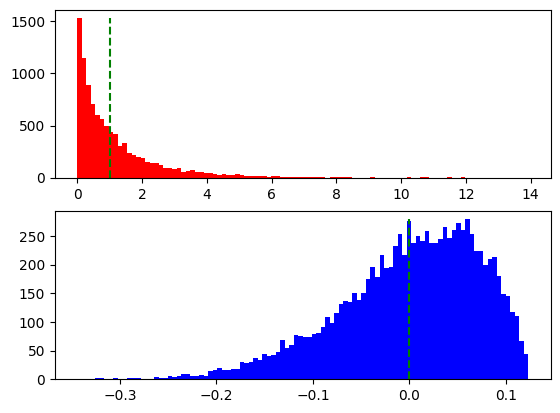

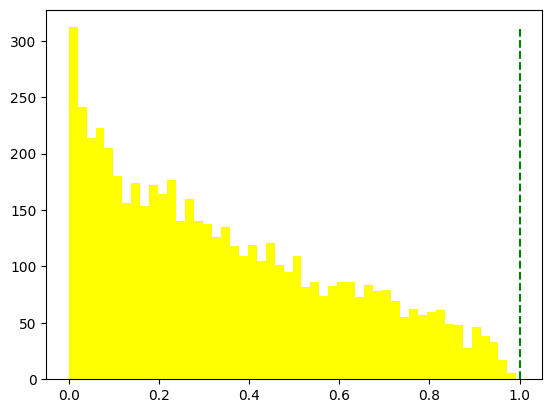

In [49]:
# test

import matplotlib.pyplot as plt

def test(n: int, m: int):
    X = np.matrix([[0, 1],
                   [1, 0]])
    Y = np.matrix([[0, -1j],
                   [1j, 0]])
    Z = np.matrix([[1, 0],
                   [0, -1]])
    sigma = [X, Y, Z]
    
    arr_eig_max = []
    arr_eig_min = []
    for i in range(n):
        T1 = generate_real_positive(3, m)
        eigens = np.linalg.eigvals(T1.T @ T1)
        eigens = eigens.real
        eig_max = eigens.max()

        T = [T1, np.zeros((3,3)), np.zeros((3,3))]
        rho = np.eye(8, 8, dtype=np.complex64)
        rho = np.asmatrix(rho)

        for i in range(3):
            for j in range(3):
                for k in range(3):
                    rho += T[k][i, j] * np.kron(np.kron(sigma[i], sigma[j]), sigma[k])
        
        rho /= rho.trace()

        eigs = np.linalg.eigvals(rho)
        eig_min = eigs.real.min()

        arr_eig_max.append(eig_max)
        arr_eig_min.append(eig_min)

    print(f"Locality: {len(list( filter(lambda x: x < 1.0, arr_eig_max) ))} / {n}")
    print(f"Positive: {len(list( filter(lambda x: x > 0.0, arr_eig_min)) )} / {n}")

    arr_positive = []
    for (e1, e2) in zip(arr_eig_min, arr_eig_max):
        if e1 > 0.0:
            arr_positive.append(e2)
    print(f"Non-locality: {len(list(filter(lambda x: x > 1.0, arr_positive)))} / {len(arr_positive)}")

    plt.subplot(211)
    (cnt, _, _) = plt.hist(arr_eig_max, bins=100, color="red")
    plt.vlines([1], 0, max(cnt), colors="green", linestyles="dashed")
    plt.subplot(212)
    (cnt, _, _) = plt.hist(arr_eig_min, bins=100, color="blue")
    plt.vlines([0], 0, max(cnt), colors="green", linestyles="dashed")
    plt.show()

    (cnt, _, _) = plt.hist(arr_positive, bins=50, color="yellow")
    plt.vlines([1], 0, max(cnt), colors="green", linestyles="dashed")
    plt.show()


test(n=10000, m=2)

Locality: 1000 / 1000
Positive: 1000 / 1000
Non-locality: 0 / 1000


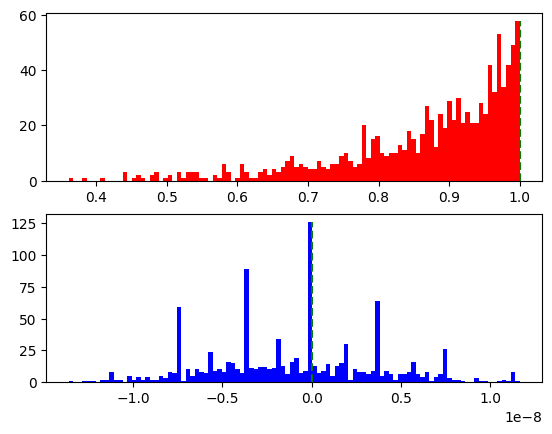

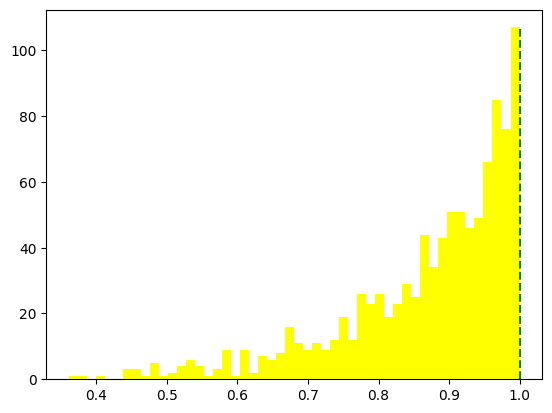

In [5]:
# test safe

from qnn import *
from run import *
import matplotlib.pyplot as plt

def test(n: int, m: int):
    arr_eig_max = []
    arr_eig_min = []

    for i in range(n):
        T1 = generate_real_positive(3, m) * 8
        T2 = np.zeros(shape=(3,3))
        T3 = np.zeros(shape=(3,3))

        rho = from_correlation_matrices3_safe(T1, T2, T3)
        if not check_positive(rho):
            print("Error")
            break
        T1, T2, T3 = to_correlation_matrices3(rho)

        eig_of_T = np.linalg.eigvals(T1.T @ T1)
        eig_max = eig_of_T.real.max()

        eigs = np.linalg.eigvals(rho)
        eig_min = eigs.real.min()

        arr_eig_max.append(eig_max)
        arr_eig_min.append(eig_min)

    print(f"Locality: {len(list( filter(lambda x: x < 1.0, arr_eig_max) ))} / {n}")
    print(f"Positive: {len(list( filter(lambda x: x > -1e-5, arr_eig_min)) )} / {n}")

    arr_positive = []
    for (e1, e2) in zip(arr_eig_min, arr_eig_max):
        if e1 > -1e-5:
            arr_positive.append(e2)
    print(f"Non-locality: {len(list(filter(lambda x: x > 1.0, arr_positive)))} / {len(arr_positive)}")

    plt.subplot(211)
    (cnt, _, _) = plt.hist(arr_eig_max, bins=100, color="red")
    plt.vlines([1], 0, max(cnt), colors="green", linestyles="dashed")
    plt.subplot(212)
    (cnt, _, _) = plt.hist(arr_eig_min, bins=100, color="blue")
    plt.vlines([0], 0, max(cnt), colors="green", linestyles="dashed")
    plt.show()

    (cnt, _, _) = plt.hist(arr_positive, bins=50, color="yellow")
    plt.vlines([1], 0, max(cnt), colors="green", linestyles="dashed")
    plt.show()


test(n=1000, m=2)

In [70]:
for i in range(100):
    rho, s = generate_examples_onlyOne_correlation_matrix()
    opt = s
    est = Svetlichny_qnn(rho)
    print(f"i = {i:5}")
    print(f"OPT = {opt:.7f}")
    print(f"EST = {est:.7f}")

    if np.abs(opt - est) > 1e-5:
        print(f"Error! rho is:")
        print(rho)
        break

i =     0
OPT = 1.5395079
EST = 1.5395079
i =     1
OPT = 2.5395977
EST = 2.5395975
i =     2
OPT = 1.6436926
EST = 1.6436926
i =     3
OPT = 2.7612156
EST = 2.7612154
i =     4
OPT = 2.1881334
EST = 2.1881335
i =     5
OPT = 2.8515662
EST = 2.8515663
i =     6
OPT = 3.0403049
EST = 3.0403049
i =     7
OPT = 1.7416441
EST = 1.7416441
i =     8
OPT = 3.0033122
EST = 3.0033121
i =     9
OPT = 2.6491611
EST = 2.6491611
i =    10
OPT = 3.3360473
EST = 3.3360474
i =    11
OPT = 1.9557153
EST = 1.9557153
i =    12
OPT = 1.4896103
EST = 1.4896103
i =    13
OPT = 3.0034393
EST = 3.0034392
i =    14
OPT = 1.5830298
EST = 1.5830297
i =    15
OPT = 2.1131627
EST = 2.1131623
i =    16
OPT = 3.2451809
EST = 3.2451808
i =    17
OPT = 3.5622481
EST = 3.5622478
i =    18
OPT = 3.1430520
EST = 3.1430519
i =    19
OPT = 1.4786220
EST = 1.4786220
i =    20
OPT = 2.3470730
EST = 2.3470728
i =    21
OPT = 3.5977718
EST = 3.5977714
i =    22
OPT = 3.4633659
EST = 3.4633658
i =    23
OPT = 3.2109207
EST = 3.

### Simultaneously diagonalizable correlation matrices

$$
\begin{align}
& T_k = \sum_{j=1}^3 w_{k j } \bm{\psi_j }^T \bm{\psi_j } \\
\Rightarrow & S(\rho) = 4 \max \lbrace \Vert \vec{w_1} \Vert, \Vert \vec{w_2} \Vert, \Vert \vec{w_3} \Vert \rbrace
\end{align}
$$

where $\vec{w_j } = (w_{1j }, w_{2 j }, w_{3 j })$

In [1]:
from qnn import *
from run import *

In [11]:
def generate_examples_diagonalizable_correlation_matrices():
    A = np.random.random(size=(3, 3))
    Q, _ = np.linalg.qr(A)

    Q = np.asmatrix(Q)
    W = np.random.random(size=(3, 3))

    def f(r: int) -> np.matrix:
        return np.diag(W[r, :])

    T1 = Q @ f(0) @ Q.T
    T2 = Q @ f(1) @ Q.T
    T3 = Q @ f(2) @ Q.T

    rho = from_correlation_matrices3(T1, T2, T3)
    s = 4.0 * max(np.linalg.norm(W[:, i]) for i in range(3))
    return rho, s

generate_examples_diagonalizable_correlation_matrices()

(None, 4.080349520198804)

postive: 1000 / 1000
nonlocal: 0 / 1000


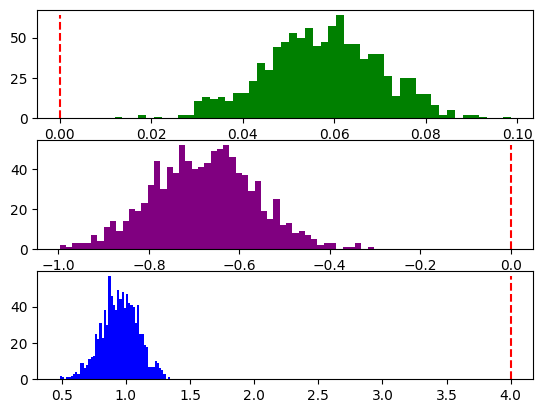

In [29]:
# test
# rho = I / 8 + \sum_{i, j, k = 1}^3 t_{i, j, k} \sigma_i \otimes \sigma_j \otimes \sigma_k

import matplotlib.pyplot as plt

def test(n: int):
    arr_eig_min = []
    arr_s = []
    arr_eig_min_fix = []

    I = np.asmatrix(np.eye(2))
    X = np.matrix([[0, 1],
                   [1, 0]])
    Y = np.matrix([[0, -1j],
                   [1j, 0]])
    Z = np.matrix([[1, 0],
                   [0, -1]])
    sigma = [I, X, Y, Z]

    for i in range(n):
        A = np.random.random(size=(3, 3))
        Q, _ = np.linalg.qr(A)
        Q = np.asmatrix(Q)
        W = np.random.random(size=(3, 3)) / 5
        # W = np.zeros(shape=(3, 3))

        T1 = Q @ np.diag(W[0, :]) @ Q.T
        T2 = Q @ np.diag(W[1, :]) @ Q.T
        T3 = Q @ np.diag(W[2, :]) @ Q.T
        rho = from_correlation_matrices3_unchecked(T1, T2, T3)
        s = 4.0 * max(np.linalg.norm(W[:, i]) for i in range(3))

        eig_of_rho = np.linalg.eigvals(rho)
        arr_eig_min.append(eig_of_rho.real.min())
        arr_s.append(s)

        # fix rho
        for i in range(4):
            for j in range(4):
                for k in range(4):
                    if i == 0 and j == 0 and k == 0:
                        continue
                    if i != 0 and j != 0 and k != 0:
                        continue
                c = np.random.random()
                rho += c * np.kron(np.kron(sigma[i], sigma[j]), sigma[k])
        eig_of_rho = np.linalg.eigvals(rho)
        arr_eig_min_fix.append(eig_of_rho.real.min())

    
    num_postive = len([_ for v in arr_eig_min if v > 1e-5])
    print(f"postive: {num_postive} / {n}")
    num_nonlocal = len([_ for s in arr_s if s > 4 + 1e-5])
    print(f"nonlocal: {num_nonlocal} / {n}")

    plt.subplot(311)
    (cnt, _, _) = plt.hist(arr_eig_min, bins=50, color="green")
    plt.vlines([0], 0, max(cnt), colors="red", linestyles="dashed")

    plt.subplot(312)
    (cnt, _, _) = plt.hist(arr_eig_min_fix, bins=50, color="purple")
    plt.vlines([0], 0, max(cnt), colors="red", linestyles="dashed")

    plt.subplot(313)
    (cnt, _, _) = plt.hist(arr_s, bins=50, color="blue")
    plt.vlines([4], 0, max(cnt), colors="red", linestyles="dashed")
    plt.show()

test(1000)

In [35]:
# test 
# add sigma0
def test(n: int):
    I = np.asmatrix(np.eye(2))
    X = np.matrix([[0, 1],
                   [1, 0]])
    Y = np.matrix([[0, -1j],
                   [1j, 0]])
    Z = np.matrix([[1, 0],
                   [0, -1]])
    sigma = [I, X, Y, Z]

    for _ in range(n):
        rho = np.zeros(shape=(8, 8), dtype=np.complex64)
        T = np.random.random(size=(4, 4, 4)) * 5
        T[0, 0, 0] = 1

        rho += T[0, 0, 0] / 8 * np.eye(8)
        for i in range(1, 4):
            for j in range(1, 4):
                for k in range(1, 4):
                    rho += T[i, j, k] * np.kron(np.kron(sigma[i], sigma[j]), sigma[k])
        eigens = np.linalg.eigvals(rho)
        e1 = eigens.real.min()

        for i in range(4):
            for j in range(4):
                for k in range(4):
                    if i != 0 and j != 0 and k != 0:
                        continue
                    if i == 0 and j == 0 and k == 0:
                        continue
                    rho += T[i, j, k] * np.kron(np.kron(sigma[i], sigma[j]), sigma[k])
        eigens = np.linalg.eigvals(rho)
        e2 = eigens.real.min()
        
        if e2 > e1:
            print(f"(e1, e2) = ({e1:.7f}, {e2:.7f})")

test(10000)
        

(e1, e2) = (-22.4752140, -22.4068832)
(e1, e2) = (-25.5826397, -24.0663700)


### $\ket{\psi} = a \ket{001} + b\ket{010} + c\ket{100}$

$$\ket{\psi} = a \ket{001} + b\ket{010} + c\ket{100}$$

where $(a, b, c) \in \Re^3$ and $\Vert (a,b,c)\Vert = 1$

In [85]:
def generate_examples_sphere(theta: np.float32, phi: np.float32) -> np.matrix:
    psi1 = np.matrix([0, 1, 0, 0, 0, 0, 0, 0]) # row vector
    psi2 = np.matrix([0, 0, 1, 0, 0, 0, 0, 0])
    psi3 = np.matrix([0, 0, 0, 0, 1, 0, 0, 0])
    a = np.sin(theta) * np.cos(phi)
    b = np.sin(theta) * np.sin(phi)
    c = np.cos(theta)
    psi = a * psi1 + b * psi2 + c * psi3
    rho = psi.H @ psi   # col * row
    return rho  

In [96]:
thetas = np.linspace(0, np.pi / 2, 100, dtype=np.float32)
phis = np.linspace(0, np.pi / 2, 100, dtype=np.float32)
estimates = []
for theta in thetas:
    row = []
    for phi in phis:
        rho = generate_examples_sphere(theta, phi)
        est = Svetlichny_qnn(rho)
        row.append(est)
        # if np.abs(est - 4.0) > 1e-3:
        #     print(f"({theta:.7f}, {phi:.7f}): {est:.7f}")
    estimates.append(row)

In [ ]:
import json

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

data = dict()
data["theta"] = thetas
data["phi"] = phis
data["estimate"] = estimates

with open("estimate_100x100_pi_div_2.json", "w") as f:
    json.dump(data, f, cls=MyEncoder)

In [ ]:
import pandas

pd = pandas.DataFrame(estimates, columns=None)

In [ ]:
pd.to_csv("estimate_100x100_pi_div_2.csv", header=None, index=0)